# How to Manually Scale Image Pixel Data
## - preparing the image pixel values prior to modeling
## - how to prepare image data for modeling with deep learning neural networks.

In [3]:
# image road
from PIL import Image
image = Image.open('sydney_bridge.png')
print(image.format)
print(image.mode)
print(image.size)
image.show()

PNG
RGBA
(1280, 856)


# Normalize Pixel Values
## - x = (x-x_min) / (x_max-x_min)
## - Neural networks process inputs using small weight values.
## - inputs with large integer values can disrupt or slow down the learning process.
## - good normalize the pixel values : between 0 to 1
## - dividing all pixels values by the largest pixel value(255)
### - normalization is a good default data preparation that can be performed if you are in doubt as to the type of data preparation to perform.

Min : 0.000, Max : 255.000
Min : 0.000, Max : 1.000


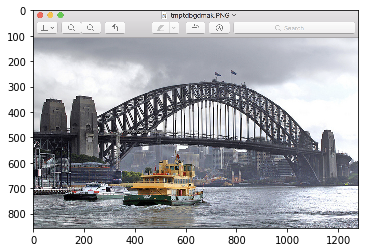

In [2]:
from numpy import asarray
from PIL import Image
from matplotlib import pyplot

image = Image.open('sydney_bridge.png')
pixels = asarray(image)
print('Min : %.3f, Max : %.3f' % (pixels.min(), pixels.max()))
pixels = pixels.astype('float32')
pixels /= 255.0
print('Min : %.3f, Max : %.3f' % (pixels.min(), pixels.max()))

pyplot.imshow(pixels)
pyplot.show()

# Center Pixel Values
## - popular data preparation technique(Centering) : pixel mean value - pixel values
## - performed before or after normalization
### - before : pixel values will be centered close to 0.5 and be in the range 0~1
### - after : the pixels will have positive and negative values, in which case images will not display correctly(preferred)

## Global Centering
## - calculating and subtracting the mean pixel value across color channels.

In [14]:
from numpy import asarray
from PIL import Image
 
image = Image.open('sydney_bridge.png')
pixels = asarray(image)
pixels = pixels.astype('float32')

mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min : %.3f, Max : %.3f' % (pixels.min(), pixels.max()))
pixels = pixels - mean
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min : %.3f, Max : %.3f' % (pixels.min(), pixels.max()))


Mean: 184.501
Min : 0.000, Max : 255.000
Mean: -0.000
Min : -184.501, Max : 70.499


## Local Centering
### - Calculating and subtracting the mean pixel value per color channel.

In [15]:
from numpy import asarray
from PIL import Image
 
image = Image.open('sydney_bridge.png')
pixels = asarray(image)
pixels = pixels.astype('float32')

means = pixels.mean(axis=(0,1), dtype='float64')
print('Mean: %s' % means)
print('Min : %s, Max : %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))
pixels = pixels - means
means = pixels.mean(axis=(0,1), dtype='float64')
print('Mean: %s' % means)
print('Min : %s, Max : %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))


Mean: [158.43480487 159.58662109 164.9829202  255.        ]
Min : [  0.   0.   0. 255.], Max : [255. 255. 255. 255.]
Mean: [-2.64736526e-10 -4.14282495e-10 -1.75013980e-10  0.00000000e+00]
Min : [-158.43480487 -159.58662109 -164.9829202     0.        ], Max : [96.56519513 95.41337891 90.0170798   0.        ]


# Standardize Pixel Values
## - x = (x - 평균) / 표준편차
## - The distribution of pixel values often follows a Normal or Gaussian distribution
## - Gaussian
### - both centering the pixel values on zero and normalizing the values by the standard deviation.
### - result : mean  0.0 and deviation 1.0
#### - performed per image or per minibatch or across the entire training dataset
#### - performed globally across channels or locally per channel

## Global Standardization

In [2]:
from numpy import asarray
from PIL import Image
 
image = Image.open('sydney_bridge.png')
pixels = asarray(image)
pixels = pixels.astype('float32')

mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Deviation : %.3f' % (mean,std))
# global standardization
pixels = (pixels - mean) / std
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Deviation : %.3f' % (mean,std))


Mean: 184.501, Deviation : 73.418
Mean: -0.000, Deviation : 1.000


## Positive Global Standardization
### - clip the standardized pixel values to the range [-1,1] and then rescale the values from [-1,1] to [0,1]

In [3]:
from numpy import asarray
from PIL import Image
from numpy import clip

image = Image.open('sydney_bridge.png')
pixels = asarray(image)
pixels = pixels.astype('float32')

mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Deviation : %.3f' % (mean,std))
# global standardization
pixels = (pixels - mean) / std
# clip
pixels = clip(pixels, -1.0, 1.0)
# [-1,1] to [0,1]
pixels = (pixels + 1.0)/ 2.0
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Deviation : %.3f' % (mean,std))
print('Min : %.3f, Max : %.3f' % (pixels.min(), pixels.max()))

Mean: 184.501, Deviation : 73.418
Mean: 0.563, Deviation : 0.396
Min : 0.000, Max : 0.980


## Local Standardization

In [4]:
from numpy import asarray
from PIL import Image
 
image = Image.open('sydney_bridge.png')
pixels = asarray(image)
pixels = pixels.astype('float32')

means = pixels.mean(axis=(0,1), dtype='float64')
stds = pixels.mean(axis=(0,1), dtype='float64')
print('Mean: %s, Stds : %s' % (means,stds))

pixels = (pixels - means) / stds
means = pixels.mean(axis=(0,1), dtype='float64')
stds = pixels.mean(axis=(0,1), dtype='float64')
print('Mean: %s, Stds : %s' % (means,stds))
print('Min : %s, Max : %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))


Mean: [158.43480487 159.58662109 164.9829202  255.        ], Stds : [158.43480487 159.58662109 164.9829202  255.        ]
Mean: [-4.47130628e-14  2.88166943e-13  1.29416720e-13  0.00000000e+00], Stds : [-4.47130628e-14  2.88166943e-13  1.29416720e-13  0.00000000e+00]
Min : [-1. -1. -1.  0.], Max : [0.60949483 0.59787831 0.54561454 0.        ]
